# Jupyter / Copilot Data Demo

In [1]:
%load_ext autoreload
%autoreload 2

## 1. Load & Visualize Oxford-IIT Pet Dataset

In [2]:
from torchvision.datasets import OxfordIIITPet

pets = OxfordIIITPet(root="~/datasets", download=True)
pets

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: /Users/ebrown/datasets

Label: 0


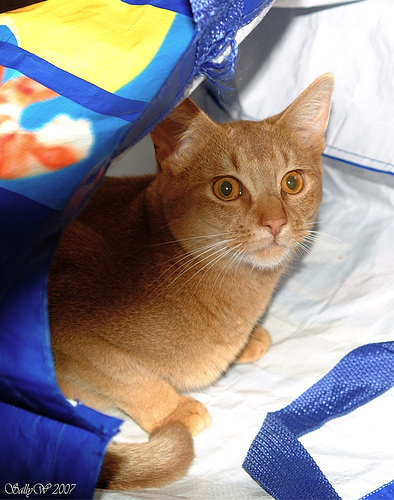

In [3]:
# visualize an example
img, label = pets[0]
print(f"Label: {label}")
display(img)

In [4]:
pets.classes

['Abyssinian',
 'American Bulldog',
 'American Pit Bull Terrier',
 'Basset Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British Shorthair',
 'Chihuahua',
 'Egyptian Mau',
 'English Cocker Spaniel',
 'English Setter',
 'German Shorthaired',
 'Great Pyrenees',
 'Havanese',
 'Japanese Chin',
 'Keeshond',
 'Leonberger',
 'Maine Coon',
 'Miniature Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian Blue',
 'Saint Bernard',
 'Samoyed',
 'Scottish Terrier',
 'Shiba Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire Bull Terrier',
 'Wheaten Terrier',
 'Yorkshire Terrier']

### 1.1 Visualize Each Class

In [5]:
# Now, let's visualize each class. let's go through the dataset and extract one image per class:
from collections import defaultdict

class_images = defaultdict(list)
for image, label in pets:
    if len(class_images[pets.classes[label]]) < 1:
        class_images[pets.classes[label]].append(image)

len(class_images)

37

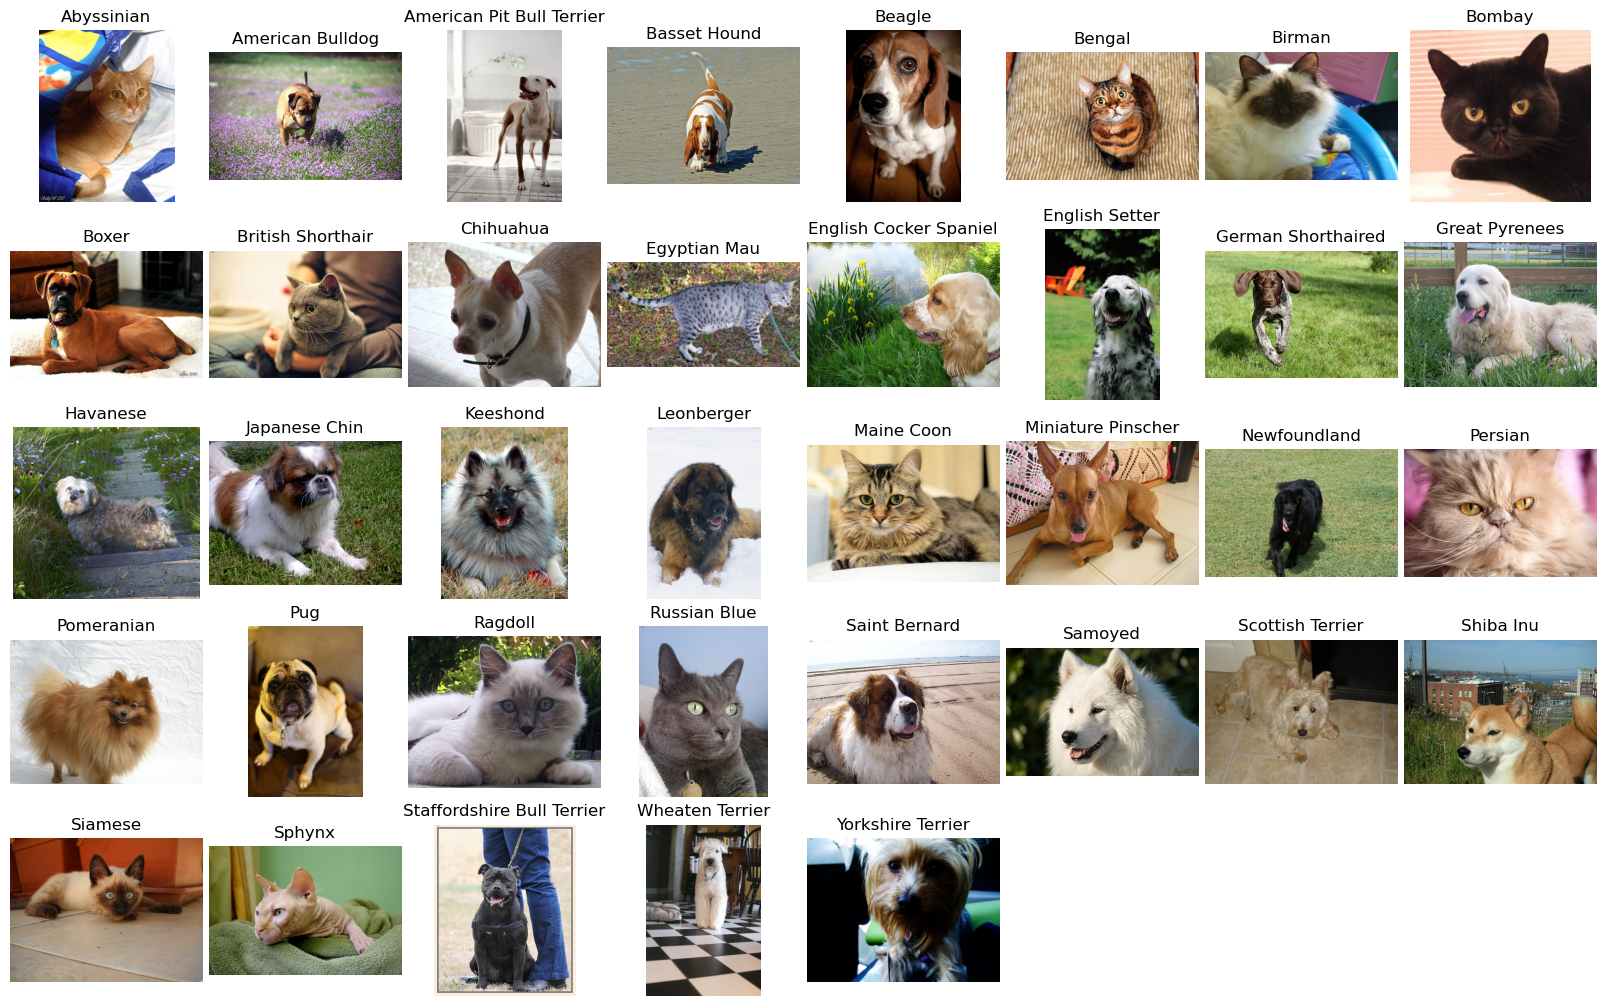

In [6]:
# now, let's plot the images.
# make a single plot with the image and the english name of the 37 classes in a grid.
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(5, 8, figsize=(16, 10))
for i, (name, images) in enumerate(class_images.items()):
    ax[i // 8, i % 8].imshow(images[0])
    ax[i // 8, i % 8].set_title(name)
    ax[i // 8, i % 8].axis("off")

# mark the last three subplots as empty
for i in range(35, 40):
    ax[i // 8, i % 8].axis("off")

# add some more space between the subplots — some of the labels are long
fig.tight_layout(pad=0.5)

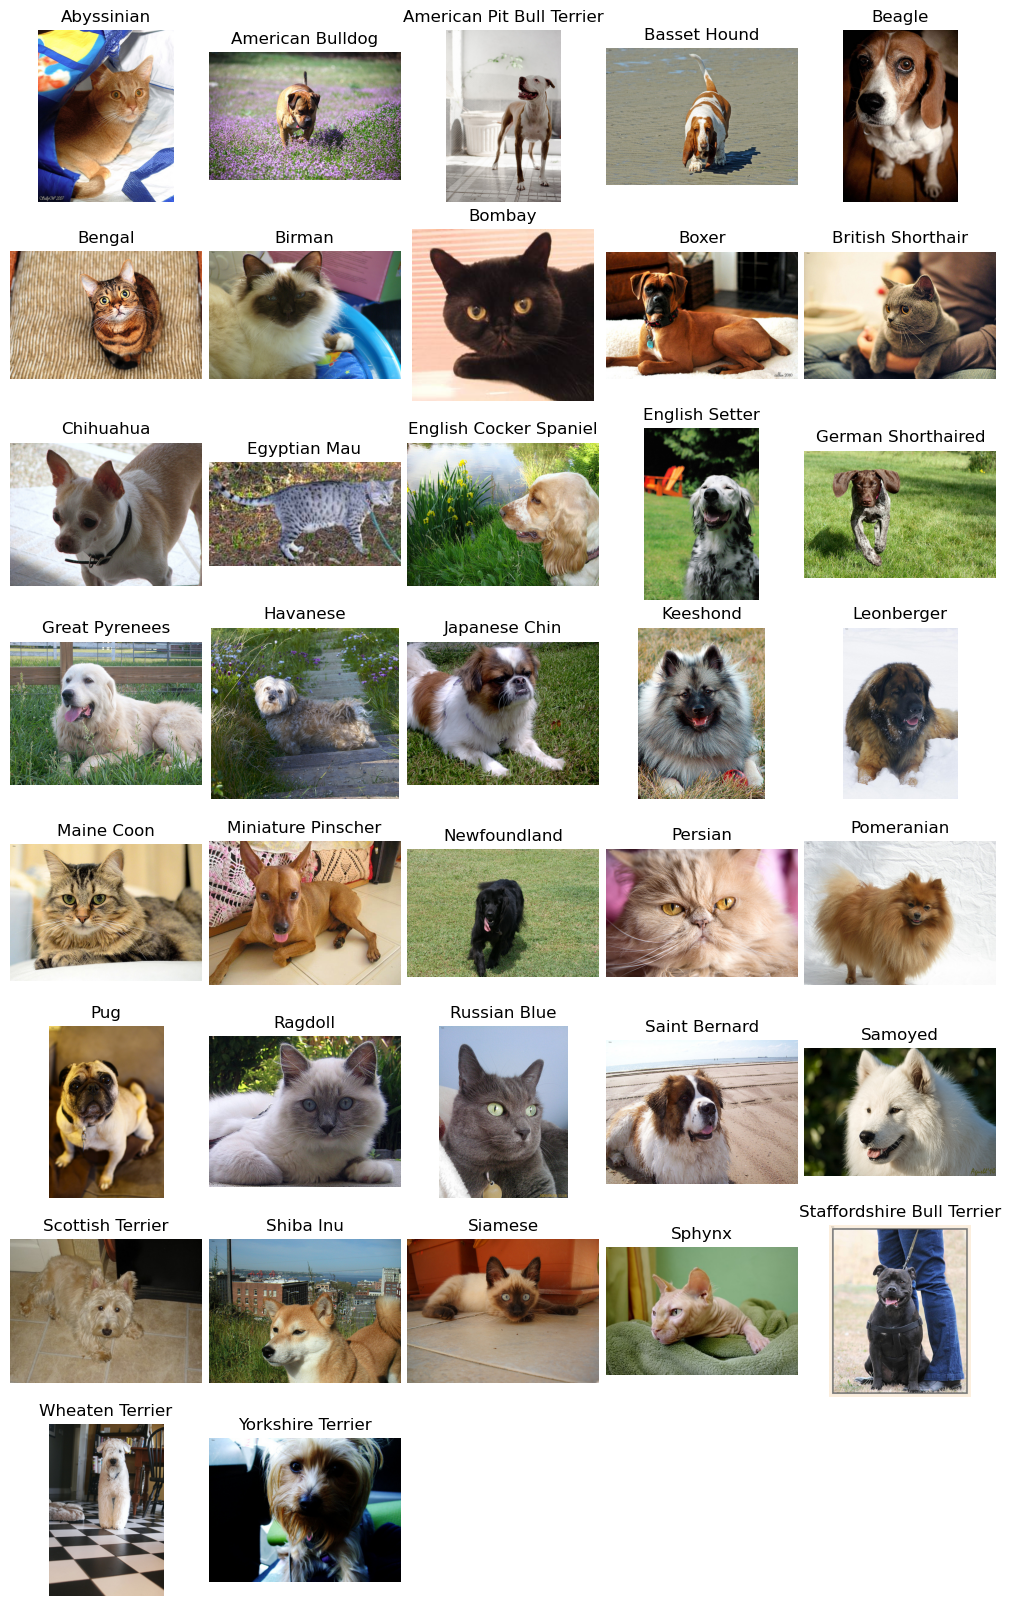

In [7]:
# redo the plot, but make it an 8x5 grid
fig, ax = plt.subplots(8, 5, figsize=(10, 16))
for i, (name, images) in enumerate(class_images.items()):
    ax[i // 5, i % 5].imshow(images[0])
    ax[i // 5, i % 5].set_title(name)
    ax[i // 5, i % 5].axis("off")


# mark the last three subplots as empty
for i in range(35, 40):
    ax[i // 5, i % 5].axis("off")

# add some more space between the subplots — some of the labels are long
fig.tight_layout(pad=0.5)

### 1.2 Create some summary statistics about the classes

In [8]:
# calculate summary statistics about the class distribution. let's count the number of images per class, and also calculate the mean and standard deviation of the image sizes.
from collections import Counter

class_counts = Counter()
class_sizes = defaultdict(list)
for image, label in pets:
    class_counts[pets.classes[label]] += 1
    class_sizes[pets.classes[label]].append(image.size)

# create df
import pandas as pd
df = pd.DataFrame.from_dict(class_counts, orient="index", columns=["count"])
df["mean_size"] = [np.mean(sizes) for sizes in class_sizes.values()]
df["std_size"] = [np.std(sizes) for sizes in class_sizes.values()]
df["mean_x"] = [np.mean([size[0] for size in sizes]) for sizes in class_sizes.values()]
df["mean_y"] = [np.mean([size[1] for size in sizes]) for sizes in class_sizes.values()]
df["std_x"] = [np.std([size[0] for size in sizes]) for sizes in class_sizes.values()]
df["std_y"] = [np.std([size[1] for size in sizes]) for sizes in class_sizes.values()]
df

count   mean_size    std_size      mean_x  \
Abyssinian                    100  427.180000  202.815822  455.270000   
American Bulldog              100  425.185000   77.853200  454.160000   
American Pit Bull Terrier     100  294.580000   77.977584  296.630000   
Basset Hound                  100  421.715000   78.571329  464.460000   
Beagle                        100  426.205000   77.175857  457.840000   
Bengal                        100  344.630000  110.875530  384.970000   
Birman                        100  425.755000   76.039365  464.510000   
Bombay                         96  390.343750  216.433993  413.114583   
Boxer                         100  425.575000   77.224506  461.190000   
British Shorthair             100  429.000000   76.525617  455.190000   
Chihuahua                     100  287.060000   76.419869  296.690000   
Egyptian Mau                   93  469.241935  439.048765  493.354839   
English Cocker Spaniel         96  431.130208   73.240747  444.354167   
English Setter                100  430.600000   71.894019  448.500000   
German Shorthaired            100  430.810000   74.050955  440.370000   
Great Pyrenees                100  432.335000   70.520159  467.790000   
Havanese                      100  435.940000   70.395003  459.010000   
Japanese Chin                 100  435.650000   70.106615  461.590000   
Keeshond                      100  435.170000   69.246957  454.730000   
Leonberger                    100  433.280000   73.293053  465.650000   
Maine Coon                    100  422.545000   92.080497  433.600000   
Miniature Pinscher            100  293.340000   88.054837  313.870000   
Newfoundland                   96  433.442708   72.869796  465.385417   
Persian                       100  429.350000   78.216926  438.100000   
Pomeranian                    100  297.410000   81.425499  318.540000   
Pug                           100  313.070000   92.257493  323.060000   
Ragdoll                       100  426.400000   78.820112  445.290000   
Russian Blue                  100  427.395000   95.635344  443.980000   
Saint Bernard                 100  429.615000   74.738656  458.930000   
Samoyed                       100  427.845000   75.570239  466.790000   
Scottish Terrier              100  437.710000   66.749052  462.620000   
Shiba Inu                     100  427.715000   75.897522  438.540000   
Siamese                        99  429.707071   73.640781  459.868687   
Sphynx                        100  428.555000   79.800670  438.130000   
Staffordshire Bull Terrier    100  435.605000   67.951666  476.780000   
Wheaten Terrier               100  429.105000   73.616805  458.440000   
Yorkshire Terrier             100  353.095000  108.952265  372.780000   

                                mean_y       std_x       std_y  
Abyssinian                  399.090000  233.591946  161.632985  
American Bulldog            396.210000   67.982309   76.299056  
American Pit Bull Terrier   292.530000   72.461114   83.078211  
Basset Hound                378.970000   64.934185   66.904328  
Beagle                      394.570000   68.888710   71.868109  
Bengal                      304.290000  114.126811   91.143875  
Birman                      387.000000   64.296422   66.528490  
Bombay                      367.572917  220.050083  210.305222  
Boxer                       389.960000   62.784981   73.813538  
British Shorthair           402.810000   71.802325   72.006485  
Chihuahua                   277.430000   73.514991   78.038869  
Egyptian Mau                445.129032  458.895112  416.869341  
English Cocker Spaniel      417.906250   71.277477   72.788661  
English Setter              412.700000   70.268556   68.985578  
German Shorthaired          421.250000   72.653789   74.200590  
Great Pyrenees              396.880000   57.387681   64.332928  
Havanese                    412.870000   65.315005   67.678749  
Japanese Chin               409.710000   62.185223   67.949289  
Keeshond          

(90.0, 100.0)

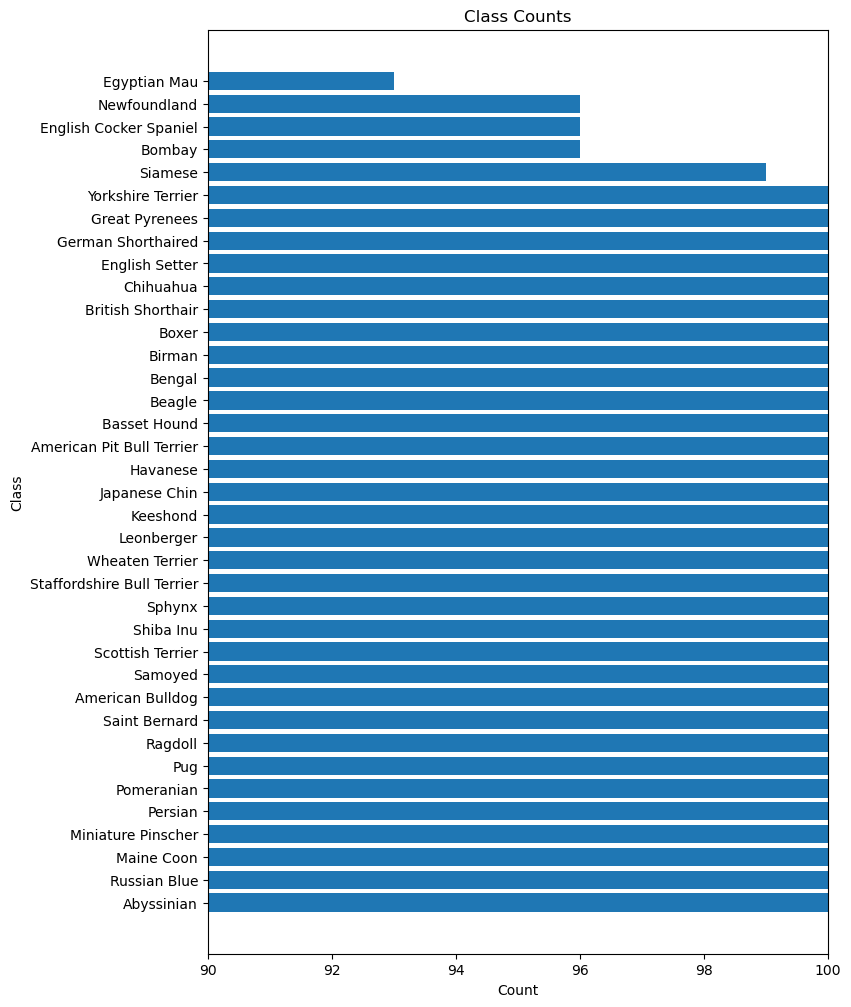

In [9]:
# # plot a histogram of the class counts
# fig, ax = plt.subplots(figsize=(16, 8))
# ax.bar(df.index, df["count"])
# ax.set_title("Class Counts")
# ax.set_xlabel("Class")
# ax.set_ylabel("Count")

# switch the x and y axis
plot_df = df.sort_values("count", ascending=False)
fig, ax = plt.subplots(figsize=(8, 12))
# ax.barh(df.index, df["count"])
ax.barh(plot_df.index, plot_df["count"])
ax.set_title("Class Counts")
ax.set_xlabel("Count")
ax.set_ylabel("Class")

# set the x axis to [90, 100]
ax.set_xlim([90, 100])

<ErrorbarContainer object of 3 artists>

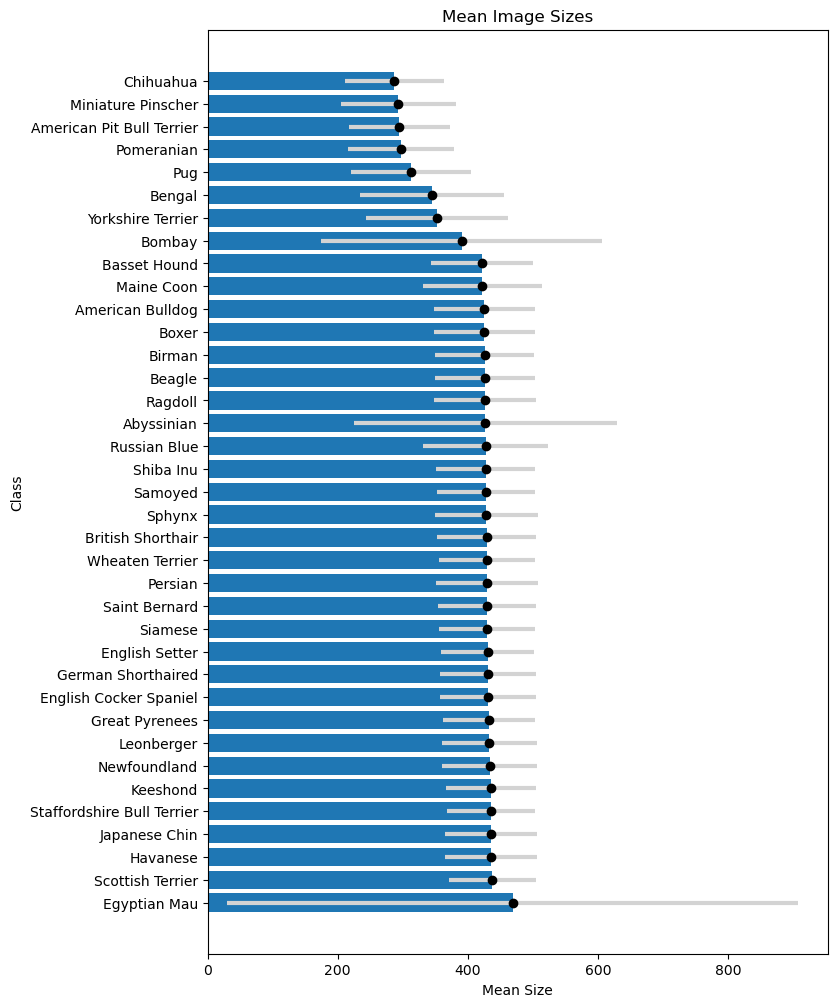

In [10]:
# plot a histogram of the mean image sizes
fig, ax = plt.subplots(figsize=(8, 12))

plot_df = df.sort_values("mean_size", ascending=False)
ax.barh(plot_df.index, plot_df["mean_size"])
ax.set_title("Mean Image Sizes")
ax.set_xlabel("Mean Size")
ax.set_ylabel("Class")

# add error bars using the standard deviation
ax.errorbar(
    plot_df["mean_size"],
    plot_df.index,
    xerr=plot_df["std_size"],
    fmt="o",
    color="black",
    ecolor="lightgray",
    elinewidth=3,
    capsize=0,
)
